CSV file 'output/csv/top_20_characters_with_title_and_file.csv' has been created in the '/Users/Antonio/Documents/proyectos/2023_tracing-regularities/research/development/data-extraction' folder.


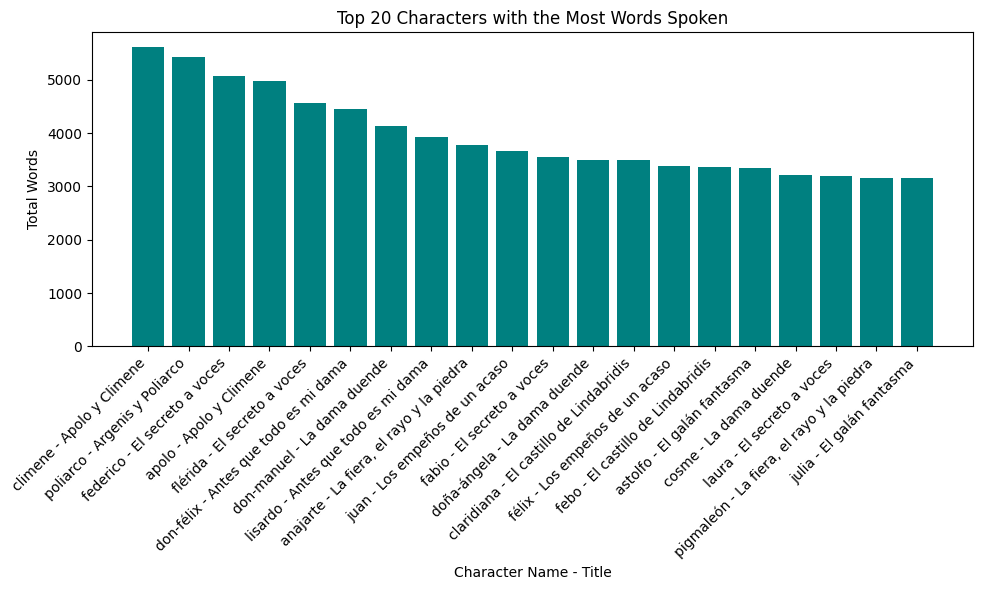

In [2]:
import os
import csv
import matplotlib.pyplot as plt
from lxml import etree
from collections import defaultdict

# Function to parse TEI XML and extract relevant information
def parse_tei(xml_path):
    tree = etree.parse(xml_path)
    ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

    # Extract the title of the document
    document_title = tree.xpath('//tei:title[@type="main"]/text()', namespaces=ns)[0]

    # Collect information about each speaker and their spoken words
    speaker_words = defaultdict(int)
    for sp in tree.xpath('//tei:sp', namespaces=ns):
        for speaker_id in sp.xpath('.//@who', namespaces=ns):
            # Check if the speaker_id starts with '#', remove it
            if speaker_id.startswith('#'):
                speaker_id = speaker_id[1:]
                
            words = ' '.join(sp.xpath('.//text()', namespaces=ns)).split()
            speaker_words[(speaker_id, xml_path, document_title)] += len(words)

    return speaker_words

# Main script
corpus_path = "comedies"

# Initialize a dictionary to store total words spoken by each character
total_words_by_character = defaultdict(int)

# Process each XML document in the corpus
for xml_file in os.listdir(corpus_path):
    if xml_file.endswith(".xml"):
        xml_path = os.path.join(corpus_path, xml_file)
        speaker_words = parse_tei(xml_path)

        # Sum words spoken by each character
        for speaker, words in speaker_words.items():
            total_words_by_character[speaker] += words

# Sort characters by total words spoken in descending order
sorted_characters = sorted(total_words_by_character.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 characters
top_20_characters = sorted_characters[:20]

# Save results to a CSV file
csv_filename = "output/csv/top_20_characters_with_title_and_file.csv"
csv_path = os.path.join(os.getcwd(), csv_filename)

with open(csv_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Character Name', 'Total Words', 'Document Title', 'File Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for (character_id, xml_path, document_title), total_words in top_20_characters:
        writer.writerow({'Character Name': character_id, 'Total Words': total_words, 'Document Title': document_title, 'File Name': os.path.basename(xml_path)})

print(f"CSV file '{csv_filename}' has been created in the '{os.getcwd()}' folder.")

# Extract data for plotting
characters = [f"{character_id} - {document_title}" for (character_id, _, document_title), total_words in top_20_characters]
total_words = [total_words for (character_id, _, _), total_words in top_20_characters]

# Create a bar diagram
plt.figure(figsize=(10, 6))
plt.bar(characters, total_words, color='teal')
plt.xlabel('Character Name - Title')
plt.ylabel('Total Words')
plt.title('Top 20 Characters with the Most Words Spoken')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the bar diagram as a PNG file
plt.savefig('output/img/top_20_comedies_characters_plot.png')

# Show the plot
plt.show()
